In [1]:
import numpy as np
from numpy import linalg as LA

In [2]:
from learn.plot_deep import plot_deep 
from learn.matrix_init import matrix_init
from learn.neural_layer import neural_layer
from learn.dataset_gen import dataset_gen

In [3]:
# TEST: layer with only one neuron
learning_rate = 0.1

neural_lineup = neural_layer(no_of_inputs=1, no_of_neurons=2, learning_rate=learning_rate, layer_name="singleton")

params_before = neural_lineup.input_parameters.copy()

input_vectors = np.array([[1],[4],[7]])
number_of_examples = len(input_vectors)
expected_outputs = np.array([[10, 100], [10, 100], [10, 100]])

neural_lineup.append_bias(input_vectors)

predicted_outputs = neural_lineup.forward_propagate(input_vectors)
print("predicted_outputs=", predicted_outputs)

computed_losss = neural_lineup.compute_loss(predicted_outputs, expected_outputs)

first_loss = 10-predicted_outputs[0]
second_loss = 100-predicted_outputs[1]
print("first_loss=", first_loss, " second_loss=", second_loss)

true_loss = LA.norm([first_loss, second_loss])
print("ASSERT_LOSS=",true_loss, " vs ", computed_losss)

neural_lineup.train(input_vectors, expected_outputs)

# Test bias
bias_before = params_before[0]
cummulative_loss = first_loss + second_loss
bias_after =  bias_before - learning_rate * cummulative_loss / number_of_examples
print("ASSERT_BIAS=>", neural_lineup.input_parameters[0,0], " vs ", bias_after)

# Test weight
weight_before = params_before[1]
weight_update1 =  first_loss*input_vectors[0]
weight_update2 =  second_loss*input_vectors[1]
print("weight_update1=", weight_update1, " weight_update2=", weight_update2)
weight_update = weight_update1 + weight_update2
weight_after = weight_before - learning_rate * weight_update / number_of_examples
print("ASSERT_WEIGHT=>", neural_lineup.input_parameters[1], " vs ", weight_after)

print("neural_lineup.input_parameters=", neural_lineup.input_parameters)


singleton  no_of_inputs= 1
singleton  no_of_neurons= 2
singleton layer_name learning_rate= 0.1
singleton  weigths_matrix= [[ 0.23637848  0.78095205]
 [ 0.24676628 -0.13194804]] (2, 2)
params_to_use= [[ 0.23637848  0.78095205]
 [ 0.24676628 -0.13194804]]
singleton  predicted_output_set= (3, 2)
predicted_outputs= [[ 0.48314475  0.64900402]
 [ 1.22344358  0.25315991]
 [ 1.9637424  -0.1426842 ]]
first_loss= [9.51685525 9.35099598]  second_loss= [98.77655642 99.74684009]
ASSERT_LOSS= 141.01153096887262  vs  173.43814349956
params_to_use= [[ 0.23637848  0.78095205]
 [ 0.24676628 -0.13194804]]
singleton  predicted_output_set= (3, 2)
==> layer_predicted_outputs[0]= [0.48314475 0.64900402] (3, 2)
==> layer_true_outputs[0]= [ 10 100] (3, 2)
*** FINAL_BIAS= 1.1140341176601436 ()
*** FINAL_WEIGHTS[0]= 3.609329079554101 (1,)
### BACKPROP[0] ->  12.859031155017858 (1,)
*** FINAL_BIAS= 10.75563606306315 ()
*** FINAL_WEIGHTS[0]= 39.84595682105828 (1,)
### BACKPROP[0] ->  138.59380374562446 (1,)
ASSERT

In [4]:
# TEST: layer with multiple neurons
learning_rate = 0.1

neural_lineup = neural_layer(no_of_inputs=2, no_of_neurons=3, learning_rate=learning_rate, layer_name="single_layer")

params_before = neural_lineup.input_parameters.copy()

input_vectors = np.array([[1, 4],[1.1, 4.5]])
expected_outputs = np.array([[10, 100, 1000], [10, 100, 1000]])

neural_lineup.forward_propagate(input_vectors)

first_loss = 10-predicted_outputs[0]
second_loss = 100-predicted_outputs[1]
print("first_loss=", first_loss, " second_loss=", second_loss)
true_loss = LA.norm([first_loss, second_loss])
print("ASSERT_LOSS=",true_loss, " vs ", computed_losss)

neural_lineup.train(input_vectors, expected_outputs)

# Test bias
bias_before = params_before[0][0]
cummulative_loss = first_loss[0] + second_loss[0]
bias_after =  bias_before - learning_rate * cummulative_loss / number_of_examples
print("ASSERT_BIAS=>", neural_lineup.input_parameters[0,0], " vs ", bias_after)


# Test weight
weight_before = params_before[0][1]  # first neuron, first weight
weight_update1 =  weight_before-learning_rate*true_loss*input_vectors[0][0]
weight_update2 =  weight_before-learning_rate*true_loss*input_vectors[1][0]
weight_update = weight_update1 + weight_update2
weight_after = weight_before - learning_rate * weight_update /2
print("ASSERT_WEIGHT=>", neural_lineup.input_parameters[0][1], " vs ", weight_after)

print("neural_lineup.input_parameters=", neural_lineup.input_parameters)


# # Test weight
# weight_before = params_before[1,1]
# input_column = input_vectors[0][0]
# weight_after =  weight_before-learning_rate*layer_loss*input_column
# print("ASSERT_WEIGHT=>", neural_lineup.input_parameters[1,1], " vs ", weight_after)


single_layer  no_of_inputs= 2
single_layer  no_of_neurons= 3
single_layer layer_name learning_rate= 0.1
single_layer  weigths_matrix= [[ 0.64474852 -0.03527823  0.6482838 ]
 [ 0.65300516  0.01944609  0.16344972]
 [-0.05184443 -0.12605362  0.30704257]] (3, 3)
params_to_use= [[ 0.64474852 -0.03527823  0.6482838 ]
 [ 0.65300516  0.01944609  0.16344972]
 [-0.05184443 -0.12605362  0.30704257]]
single_layer  predicted_output_set= (2, 3)
first_loss= [9.51685525 9.35099598]  second_loss= [98.77655642 99.74684009]
ASSERT_LOSS= 141.01153096887262  vs  173.43814349956
params_to_use= [[ 0.64474852 -0.03527823  0.6482838 ]
 [ 0.65300516  0.01944609  0.16344972]
 [-0.05184443 -0.12605362  0.30704257]]
single_layer  predicted_output_set= (2, 3)
==> layer_predicted_outputs[0]= [ 1.09037595 -0.52004662  2.03990381] (2, 3)
==> layer_true_outputs[0]= [  10  100 1000] (2, 3)
*** FINAL_BIAS= 1.5337420107856135 ()
*** FINAL_WEIGHTS[0]= 1.5863498787263504 (2,)
### BACKPROP[0] ->  16.973483819183308 (2,)
*** 

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

random_input_set, input_examples, output_training_set, training_dataset = dataset_gen.get_test_dataset()
neuron_x, neuron_x_losses = dataset_gen.run_training(random_input_set, \
                                                     input_examples, output_training_set, training_dataset)
predicted_outputs = neuron_x.forward_propagate(input_examples)
evaluated_dataset = np.column_stack((random_input_set, predicted_outputs))


least_squares_network  no_of_inputs= 2
least_squares_network  no_of_neurons= 1
least_squares_network layer_name learning_rate= 0.0001
least_squares_network  weigths_matrix= [[0.48376209]
 [0.57525265]
 [0.49963019]] (3, 1)
params_to_use= [[0.48376209]
 [0.57525265]
 [0.49963019]]
least_squares_network  predicted_output_set= (10, 1)
==> layer_predicted_outputs[0]= [45.33707019] (10, 1)
==> layer_true_outputs[0]= 167.77830166029685 (10,)
*** FINAL_BIAS= [0.49342291] (1,)
*** FINAL_WEIGHTS[0]= 0.6319739681466459 (2,)
### BACKPROP[0] ->  212.62719444362222 (2,)
params_to_use= [[0.49342291]
 [0.63197397]
 [1.27287275]]
least_squares_network  predicted_output_set= (10, 1)
==> layer_predicted_outputs[0]= [107.23332663] (10, 1)
==> layer_true_outputs[0]= 167.77830166029685 (10,)
*** FINAL_BIAS= [0.49817353] (1,)
*** FINAL_WEIGHTS[0]= 0.6599733029577178 (2,)
### BACKPROP[0] ->  104.10815790018573 (2,)
params_to_use= [[0.49817353]
 [0.6599733 ]
 [1.65195217]]
least_squares_network  predicted_out

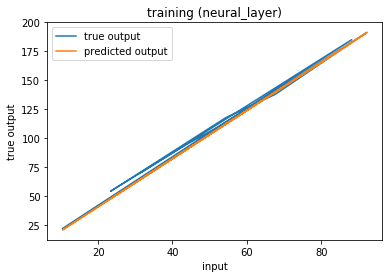

In [7]:
plot_deep.plot_multi_line(training_dataset, 'true output', evaluated_dataset, 'predicted output', \
                'training (neural_layer)', 'input', 'true output')


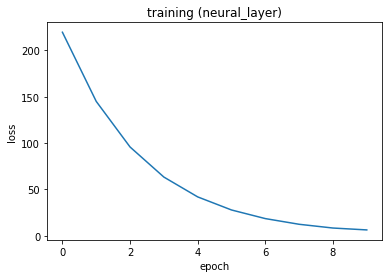

In [6]:
# 1 neural_layer: neuralx
# print("neuron_losses=", neuron_losses)
plot_deep.plot_labeled_line(neuron_x_losses, 'training (neural_layer)', 'epoch', 'loss')
